<a href="https://colab.research.google.com/github/ACakshay/AI61002-Assignment/blob/main/Assignment2_18CY20004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Akshay Chordia
# 18CY20004

Importing useful libraries

In [10]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
from torchvision import transforms,datasets
import matplotlib.pyplot as plt

**Defining Architecture of modal**

In [11]:
class FFNN(nn.Module): #nn.Module --> Base class for all Neural Network modules
  def __init__(self):
    super(FFNN, self).__init__() #template
    
    self.fc1 = nn.Linear(784, 100)
    self.fc2 = nn.Linear(100, 10)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = x.view(-1,28*28)
    x = self.fc1(x)
    x = self.sigmoid(x)
    x = self.fc2(x)
    x = F.softmax(x, dim=1)
    return x

Importing data


In [12]:
apply_transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST(root='./', 
                          train = True, 
                          download = True, 
                          transform = apply_transform
                          )
testset = datasets.MNIST(root='./', 
                          train = False, 
                          download = True, 
                          transform = apply_transform
                          )

# Defining Function for modal training and calculation accuracy 

In [13]:
def train_modal(lrate,batch_size,epochcount=range(5)):
    use_gpu = torch.cuda.is_available()
    net = FFNN()
    if use_gpu:
      print('GPU is available!')
      net = net.cuda()
    criterion = nn.CrossEntropyLoss()
    optime1 = torch.optim.SGD(net.parameters(), lr=lrate)
    
    

    trainLoader = torch.utils.data.DataLoader(
        trainset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=4
        )
    testloader = torch.utils.data.DataLoader(
        testset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=4
        )
    losstrain=[]
    losstest=[]
    accutest =[]
    accutrain=[]

    def accuracy(trainloaderr):
        corr,size=0,0
        for i, data in enumerate(trainloaderr):

          inputs, labels = data
          outputs = net(inputs)
          outputss=torch.argmax(outputs, axis = 1)
          corr+=sum((outputss==labels))
          size+=len(labels)
        return (corr/size)
    
    for epoch in epochcount:
        losstrainbatch=0.0
        losstestbatch=0.0

        optime1.zero_grad()
        for i, data in enumerate(trainLoader):

          inputs, labels = data
          outputs = net(inputs)
          loss = criterion(outputs,labels)
          loss.backward()  
          optime1.step()
          losstrainbatch+=loss.item()
        accutrain.append(accuracy(trainLoader))

        losstrain.append(losstrainbatch/len(trainLoader))


        print('Training Epoch:  {}/{}, loss: {}, accuracy: {}'.format(epoch+1,epochcount[-1]+1,losstrain[-1],accutrain[-1]))
        for i, data in enumerate(testloader):

          inputs, labels = data
          outputs = net(inputs)
          loss = criterion(outputs,labels)
          losstestbatch+=loss.item()

        losstest.append(losstestbatch/len(testloader))
        accutest.append(accuracy(testloader))
        print('Testing Epoch:  {}/{}, loss: {}, accuracy: {}'.format(epoch+1,epochcount[-1]+1,losstest[-1],accutest[-1]))


    plt.title("Loss vs Epoch")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(losstrain,"r",label="Training Loss")
    plt.plot(losstest,"b",label="Testing Loss")
    plt.legend()
    plt.show()

    plt.title("Accuracy vs Epoch")
    plt.xlabel("epoch")
    plt.ylabel("Accuracy")
    plt.plot(accutrain,"g",label="Training Accuracy")
    plt.plot(accutest,"pink",label="Testing Accuracy")
    plt.legend()
    plt.show()
    
    return losstrain,losstest,accutrain,accutest
    

#Learning Rate: 0.025
#Batch size: 256

Training Epoch:  1/50, loss: 2.128860742487806, accuracy: 0.5608500242233276
Testing Epoch:  1/50, loss: 1.8838045954704286, accuracy: 0.5702999830245972
Training Epoch:  2/50, loss: 1.830848409267182, accuracy: 0.6537166833877563
Testing Epoch:  2/50, loss: 1.802481284737587, accuracy: 0.6585000157356262
Training Epoch:  3/50, loss: 1.7951426602424458, accuracy: 0.6694666743278503
Testing Epoch:  3/50, loss: 1.7859422862529755, accuracy: 0.673799991607666
Training Epoch:  4/50, loss: 1.7859171735479478, accuracy: 0.6777166724205017
Testing Epoch:  4/50, loss: 1.7817612826824187, accuracy: 0.6794000267982483
Training Epoch:  5/50, loss: 1.7796874528235578, accuracy: 0.6827666759490967
Testing Epoch:  5/50, loss: 1.7726707458496094, accuracy: 0.6834999918937683
Training Epoch:  6/50, loss: 1.7734780671748709, accuracy: 0.7161333560943604
Testing Epoch:  6/50, loss: 1.7455746352672576, accuracy: 0.7139999866485596
Training Epoch:  7/50, loss: 1.719336436149922, accuracy: 0.75905001163482

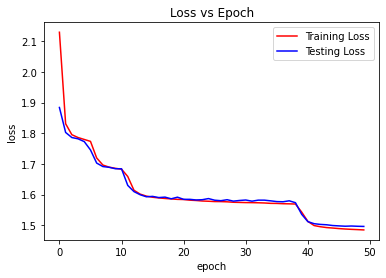

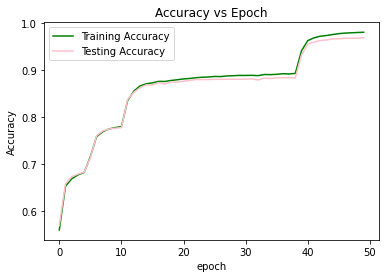

In [14]:
losstrain1,losstest1,accutrain1,accutest1 = train_modal(0.025,256,range(50))

#Learning Rate: 0.05
#Batch size: 256

In [ ]:
losstrain2,losstest2,accutrain2,accutest2 = train_modal(0.05,256,range(50))

Training Epoch:  1/50, loss: 2.0152123801251673, accuracy: 0.7114666700363159
Testing Epoch:  1/50, loss: 1.7447433203458786, accuracy: 0.7163000106811523
Training Epoch:  2/50, loss: 1.7257985520870127, accuracy: 0.751966655254364
Testing Epoch:  2/50, loss: 1.7098383605480194, accuracy: 0.7547000050544739
Training Epoch:  3/50, loss: 1.702875401618633, accuracy: 0.7640500068664551
Testing Epoch:  3/50, loss: 1.6987845122814178, accuracy: 0.7663999795913696
Training Epoch:  4/50, loss: 1.6926603804243372, accuracy: 0.7705833315849304
Testing Epoch:  4/50, loss: 1.6896174490451812, accuracy: 0.7717999815940857
Training Epoch:  5/50, loss: 1.6879381210245985, accuracy: 0.7734833359718323
Testing Epoch:  5/50, loss: 1.6896897584199906, accuracy: 0.7739999890327454
Training Epoch:  6/50, loss: 1.6850101998511782, accuracy: 0.7765499949455261
Testing Epoch:  6/50, loss: 1.6808164834976196, accuracy: 0.7760999798774719
Training Epoch:  7/50, loss: 1.6815324935507268, accuracy: 0.77918332815

#Learning Rate: 0.1
#Batch size: 256

In [ ]:
losstrain3,losstest3,accutrain3,accutest3 = train_modal(0.1,256,range(50))

#Learning Rate: 0.2
#Batch size: 256

In [ ]:
losstrain4,losstest4,accutrain4,accutest4 = train_modal(0.2,256,range(50))

#Learning Rate: 0.5
#Batch size: 256

In [ ]:
losstrain5,losstest5,accutrain5,accutest5 = train_modal(0.5,256,range(50))

# Learning rate: varying 

# Batch size : 256

In [ ]:
def modal_train_varylr(lrate,batchsize,eopchcount=range(5))   
    use_gpu = torch.cuda.is_available()
    net = FFNN()
    if use_gpu:
    #   print('GPU is available!')
      net = net.cuda()
    criterion = nn.CrossEntropyLoss()
    optime1 = torch.optim.SGD(net.parameters(), lr=lrate)



    trainLoader = torch.utils.data.DataLoader(
        trainset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=4
        )
    testloader = torch.utils.data.DataLoader(
        testset, 
        batch_size=batch_size,
        shuffle=True, 
        num_workers=4
        )
    losstrain=[]
    losstest=[]
    accutest =[]
    accutrain=[]

    def accuracy(trainloaderr):
        corr,size=0,0
        for i, data in enumerate(trainloaderr):

          inputs, labels = data
          outputs = net(inputs)
          outputss=torch.argmax(outputs, axis = 1)
          corr+=sum((outputss==labels))
          size+=len(labels)
        return (corr/size)

    for epoch in epochcount:
        for g in optim6.param_groups:
          g['lr'] = g['lr']*exp(-(0.1)*eopch))

        losstrainbatch=0.0
        losstestbatch=0.0
        losstrainbatch=0.0
        losstestbatch=0.0

        optime1.zero_grad()
        for i, data in enumerate(trainLoader):

          inputs, labels = data
          outputs = net(inputs)
          loss = criterion(outputs,labels)
          loss.backward()  
          optime1.step()
          losstrainbatch+=loss.item()
        accutrain.append(accuracy(trainLoader))

        losstrain.append(losstrainbatch/len(trainLoader))


        print('Training Epoch:  {}/20, loss: {}, accuracy: {}'.format(epoch+1,losstrain[-1],accutrain[-1]))
        for i, data in enumerate(testloader):

          inputs, labels = data
          outputs = net(inputs)
          loss = criterion(outputs,labels)
          losstestbatch+=loss.item()

        losstest.append(losstestbatch/len(testloader))
        accutest.append(accuracy(testloader))
        print('Testing Epoch:  {}/20, loss: {}, accuracy: {}'.format(epoch+1,losstest[-1],accutest[-1]))


    plt.title("Loss vs Epoch")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(losstrain,"r",label="Training Loss")
    plt.plot(losstest,"b",label="Testing Loss")
    plt.legend()
    plt.show()

    plt.title("Accuracy vs Epoch")
    plt.xlabel("epoch")
    plt.ylabel("Accuracy")
    plt.plot(accutrain,"g",label="Training Accuracy")
    plt.plot(accutest,"pink",label="Testing Accuracy")
    plt.legend()
    plt.show()

    losstrain6,losstest6,accutrain6,accutest6=losstrain,losstest,accutrain,accutest

modal_train_varylr(0.05,256,range(50))    

# Learning rate: 0.1

#  Batch size : varying

# Batch size:256

In [ ]:
losstrain7,losstest7,accutrain7,accutest7 = train_modal(0.1,256,range(50))

# Batch size:1024

In [ ]:
losstrain8,losstest8,accutrain8,accutest8 = train_modal(0.1,1024,range(50))